<a href="https://colab.research.google.com/github/KaanErdogdu/Prjoject_1_RFM_Analysis/blob/master/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from datetime import datetime as dt, timedelta
import datetime as dt
import re


warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [3]:
projectData=pd.read_csv("RFM _Raw_Data.csv")

In [4]:
projectData.head()

,cd_user_id,cd_user_signup_date,Transaction ID,Date,Revenue,Quantity
0,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2249427486,20200430,128970.00,10
1,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2249427729,20200430,128970.00,10
2,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2249908620,20200514,122091.00,9
3,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2248612580,20200415,118670.00,30
4,5606F992-F6CA-E911-80CB-00155D61134E,20191023,2249010961,20200421,103494.99,15


In [5]:
projectData.columns = ['User_ID', 'SignUp_Date', 'Transaction_ID', 'Date', 'Revenue','Quantity']

In [6]:
projectData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179261 entries, 0 to 179260
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_ID         179261 non-null  object 
 1   SignUp_Date     179261 non-null  int64  
 2   Transaction_ID  179261 non-null  object 
 3   Date            179261 non-null  int64  
 4   Revenue         179261 non-null  float64
 5   Quantity        179261 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 8.2+ MB


In [7]:
projectData['DateTime'] = projectData['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
projectData['DateTime']

0        2020-04-30
1        2020-04-30
2        2020-05-14
3        2020-04-15
4        2020-04-21
            ...    
179256   2020-02-12
179257   2020-04-26
179258   2020-02-14
179259   2020-04-09
179260   2020-03-25
Name: DateTime, Length: 179261, dtype: datetime64[ns]

In [8]:
projectData['SignUp_DateTime'] = projectData['SignUp_Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
projectData['SignUp_DateTime']

0        2018-11-22
1        2018-11-22
2        2018-11-22
3        2018-11-22
4        2019-10-23
            ...    
179256   2020-02-12
179257   2018-11-22
179258   2020-01-08
179259   2020-04-09
179260   2020-02-28
Name: SignUp_DateTime, Length: 179261, dtype: datetime64[ns]

In [9]:
projectData.head()

,User_ID,SignUp_Date,Transaction_ID,Date,Revenue,Quantity,DateTime,SignUp_DateTime
0,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2249427486,20200430,128970.00,10,2020-04-30,2018-11-22
1,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2249427729,20200430,128970.00,10,2020-04-30,2018-11-22
2,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2249908620,20200514,122091.00,9,2020-05-14,2018-11-22
3,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2248612580,20200415,118670.00,30,2020-04-15,2018-11-22
4,5606F992-F6CA-E911-80CB-00155D61134E,20191023,2249010961,20200421,103494.99,15,2020-04-21,2019-10-23


In [10]:
projectData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179261 entries, 0 to 179260
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   User_ID          179261 non-null  object        
 1   SignUp_Date      179261 non-null  int64         
 2   Transaction_ID   179261 non-null  object        
 3   Date             179261 non-null  int64         
 4   Revenue          179261 non-null  float64       
 5   Quantity         179261 non-null  int64         
 6   DateTime         179261 non-null  datetime64[ns]
 7   SignUp_DateTime  179261 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 10.9+ MB


In [11]:
projectData.nunique()

User_ID            143728
SignUp_Date           551
Transaction_ID     178819
Date                  150
Revenue             13529
Quantity               37
DateTime              150
SignUp_DateTime       551
dtype: int64

In [12]:
projectData.describe()

,SignUp_Date,Date,Revenue,Quantity
count,1.792610e+05,1.792610e+05,179261.000000,179261.000000
mean,2.019537e+07,2.020040e+07,2205.070735,1.392645
std,7.959716e+03,1.149898e+02,3271.647456,1.370745
min,2.018112e+07,2.020010e+07,0.000000,0.000000
25%,2.019073e+07,2.020033e+07,219.000000,1.000000
50%,2.020040e+07,2.020042e+07,1049.000000,1.000000
75%,2.020043e+07,2.020051e+07,3099.000000,1.000000
max,2.020053e+07,2.020053e+07,128970.000000,80.000000


In [13]:
projectData.isnull().sum()

User_ID            0
SignUp_Date        0
Transaction_ID     0
Date               0
Revenue            0
Quantity           0
DateTime           0
SignUp_DateTime    0
dtype: int64

In [14]:
projectData_SignUpDate = projectData[['User_ID','SignUp_Date']]
projectData_SignUpDate.drop_duplicates(subset='User_ID',keep='first',inplace=True)

In [15]:
projectData_SignUpDate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143728 entries, 0 to 179258
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User_ID      143728 non-null  object
 1   SignUp_Date  143728 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [16]:
projectData_SignUpDate.nunique()

User_ID        143728
SignUp_Date       551
dtype: int64

In [17]:
projectData_SignUpDate.head()

,User_ID,SignUp_Date
0,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122
4,5606F992-F6CA-E911-80CB-00155D61134E,20191023
6,C069BAC5-01C4-E811-90F9-00155D619647,20181122
8,4332E3E1-B203-EA11-80CC-00155D61134E,20191110
10,69CDE97A-F0C6-E811-90F9-00155D619647,20200410


In [18]:
projectData_SignUpDate.nunique()

User_ID        143728
SignUp_Date       551
dtype: int64

In [19]:
projectData_SignUpDate.drop_duplicates()

,User_ID,SignUp_Date
0,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122
4,5606F992-F6CA-E911-80CB-00155D61134E,20191023
6,C069BAC5-01C4-E811-90F9-00155D619647,20181122
8,4332E3E1-B203-EA11-80CC-00155D61134E,20191110
10,69CDE97A-F0C6-E811-90F9-00155D619647,20200410
...,...,...
179252,E823B8AA-659F-EA11-80D0-00155D61134E,20200526
179254,5D8E5472-A9C5-E811-90F9-00155D619647,20181122
179255,B89B48D0-5E4D-EA11-80D3-00155D7CD320,20200212
179256,E0622B90-134D-EA11-80D3-00155D7CD320,20200212


In [21]:
projectData_SignUpDate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143728 entries, 0 to 179258
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User_ID      143728 non-null  object
 1   SignUp_Date  143728 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [22]:
projectData_RFM = projectData[['User_ID','DateTime','Transaction_ID','Quantity','Revenue']]

In [23]:
projectData_RFM.head()

,User_ID,DateTime,Transaction_ID,Quantity,Revenue
0,67A9CBA3-FDC3-E811-90F9-00155D619647,2020-04-30,2249427486,10,128970.00
1,67A9CBA3-FDC3-E811-90F9-00155D619647,2020-04-30,2249427729,10,128970.00
2,67A9CBA3-FDC3-E811-90F9-00155D619647,2020-05-14,2249908620,9,122091.00
3,67A9CBA3-FDC3-E811-90F9-00155D619647,2020-04-15,2248612580,30,118670.00
4,5606F992-F6CA-E911-80CB-00155D61134E,2020-04-21,2249010961,15,103494.99


In [24]:
projectData_RFM.nunique()

User_ID           143728
DateTime             150
Transaction_ID    178819
Quantity              37
Revenue            13529
dtype: int64

In [25]:
projectData_RFM['DateTime'].min(),projectData_RFM['DateTime'].max()


(Timestamp('2020-01-01 00:00:00'), Timestamp('2020-05-29 00:00:00'))

In [26]:
PRESENT = dt.datetime(2020,5,30)

In [27]:
rfm= projectData_RFM.groupby('User_ID').agg({'DateTime': lambda date: (PRESENT - date.max()).days,
                                        'Transaction_ID': lambda num: len(num),
                                        'Revenue': lambda price: price.sum()})

In [28]:
rfm.head()

,DateTime,Transaction_ID,Revenue
User_ID,,,
00000000-0000-0000-0000-000000000000,73,2,3558.3
0000279A-87C8-E811-90F9-00155D619647,78,1,137.4
00003B79-3370-EA11-80D3-00155D7CD320,64,1,4199.0
0000A4AF-1986-EA11-80D4-00155D7CD320,36,1,477.0
00010E76-A380-EA11-80CE-00155D61134E,43,1,184.9


In [29]:
rfm.nunique()

DateTime            150
Transaction_ID       91
Revenue           18253
dtype: int64

In [30]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143728 entries, 00000000-0000-0000-0000-000000000000 to f7e09f43-5d82-e911-80cc-00155d7cd320
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DateTime        143728 non-null  int64  
 1   Transaction_ID  143728 non-null  int64  
 2   Revenue         143728 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.4+ MB


In [31]:
rfm.columns=['recency','frequency','monetary']


In [32]:
rfm['monetary'] = rfm['monetary'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(float)


In [33]:
rfm.head()

,recency,frequency,monetary
User_ID,,,
00000000-0000-0000-0000-000000000000,73,2.0,3558
0000279A-87C8-E811-90F9-00155D619647,78,1.0,137
00003B79-3370-EA11-80D3-00155D7CD320,64,1.0,4199
0000A4AF-1986-EA11-80D4-00155D7CD320,36,1.0,477
00010E76-A380-EA11-80CE-00155D61134E,43,1.0,184


In [34]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])

In [35]:
def pct_rank_qcut(series, n):
    edges = pd.Series([float(i) / n for i in range(n + 1)])
    f = lambda x: (edges >= x).argmax()
    return series.rank(pct=1).apply(f)

In [36]:
rfm['f_quartile'] = pct_rank_qcut(rfm['frequency'], 4)

In [37]:
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['1','2','3','4'])

In [ ]:
#rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1']) çalışmıyor %25 ve %50 aralıkları 1 olduğu için

In [38]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
User_ID,,,,,,
00000000-0000-0000-0000-000000000000,73,2.0,3558,1,4,4
0000279A-87C8-E811-90F9-00155D619647,78,1.0,137,1,2,1
00003B79-3370-EA11-80D3-00155D7CD320,64,1.0,4199,1,2,4
0000A4AF-1986-EA11-80D4-00155D7CD320,36,1.0,477,3,2,2
00010E76-A380-EA11-80CE-00155D61134E,43,1.0,184,2,2,1


In [ ]:
#def func(x):
 ### if x <= 10:
  ##  return 1
  #elif x <= 

In [39]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
User_ID,,,,,,,
00000000-0000-0000-0000-000000000000,73,2.0,3558,1,4,4,144
0000279A-87C8-E811-90F9-00155D619647,78,1.0,137,1,2,1,121
00003B79-3370-EA11-80D3-00155D7CD320,64,1.0,4199,1,2,4,124
0000A4AF-1986-EA11-80D4-00155D7CD320,36,1.0,477,3,2,2,322
00010E76-A380-EA11-80CE-00155D61134E,43,1.0,184,2,2,1,221


In [40]:
rfm.describe()

,recency,frequency,monetary,f_quartile
count,143728.000000,143728.000000,1.437280e+05,143728.000000
mean,47.362135,1.247224,2.750022e+03,2.223269
std,34.014627,3.014598,1.684836e+04,0.629835
min,1.000000,1.000000,1.000000e+00,2.000000
25%,23.000000,1.000000,2.180000e+02,2.000000
50%,40.000000,1.000000,9.990000e+02,2.000000
75%,60.000000,1.000000,3.239000e+03,2.000000
max,150.000000,563.000000,2.807569e+06,4.000000


In [41]:
# Best customerlara göre sıralama
rfm[rfm['RFM_Score']=='444'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
User_ID,,,,,,,
C069BAC5-01C4-E811-90F9-00155D619647,1,210.0,2807569,4,4,4,444
B0A19A45-D6D6-E911-80CC-00155D7CD320,1,297.0,2727999,4,4,4,444
A4B41362-16FB-E911-80D1-00155D7CD320,2,211.0,1738976,4,4,4,444
86417C10-026E-EA11-80D3-00155D7CD320,1,153.0,1553128,4,4,4,444
C146B462-F0AF-E911-80CB-00155D61134E,2,120.0,1318382,4,4,4,444


In [42]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143728 entries, 00000000-0000-0000-0000-000000000000 to f7e09f43-5d82-e911-80cc-00155d7cd320
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   recency     143728 non-null  int64   
 1   frequency   143728 non-null  float64 
 2   monetary    143728 non-null  int64   
 3   r_quartile  143728 non-null  category
 4   f_quartile  143728 non-null  int64   
 5   m_quartile  143728 non-null  category
 6   RFM_Score   143728 non-null  object  
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 6.9+ MB


In [43]:
RFM_with_SignUpDate = rfm.merge(projectData_SignUpDate,on = "User_ID", how= "left", )
RFM_with_SignUpDate.head(5)

,User_ID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,SignUp_Date
0,00000000-0000-0000-0000-000000000000,73,2.0,3558,1,4,4,144,20181122
1,0000279A-87C8-E811-90F9-00155D619647,78,1.0,137,1,2,1,121,20181122
2,00003B79-3370-EA11-80D3-00155D7CD320,64,1.0,4199,1,2,4,124,20200327
3,0000A4AF-1986-EA11-80D4-00155D7CD320,36,1.0,477,3,2,2,322,20200424
4,00010E76-A380-EA11-80CE-00155D61134E,43,1.0,184,2,2,1,221,20200417


In [44]:
RFM_with_SignUpDate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143728 entries, 0 to 143727
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   User_ID      143728 non-null  object  
 1   recency      143728 non-null  int64   
 2   frequency    143728 non-null  float64 
 3   monetary     143728 non-null  int64   
 4   r_quartile   143728 non-null  category
 5   f_quartile   143728 non-null  int64   
 6   m_quartile   143728 non-null  category
 7   RFM_Score    143728 non-null  object  
 8   SignUp_Date  143728 non-null  int64   
dtypes: category(2), float64(1), int64(4), object(2)
memory usage: 9.0+ MB


In [45]:
rfm_updated = rfm.replace(to_replace ='444', value = 'Best Customers', regex = True) 
rfm_updated2 = rfm_updated.replace(to_replace ='[4|3|2][4|3|2][4|3]', value = 'Promising Best Customers', regex = True) 
rfm_updated3 = rfm_updated2.replace(to_replace ='[4][1|2][4|3]', value = 'High Spending New Customers', regex = True) 
rfm_updated4 = rfm_updated3.replace(to_replace ='[4|3|2|1][4|3][1|2]', value = 'Lowest-Spending Active Loyal Customers', regex = True) 
rfm_updated5 = rfm_updated4.replace(to_replace ='[1|2][4|3|2][4|3]', value = 'Churned Best Customers', regex = True) 
rfm_updated6 = rfm_updated5.replace(to_replace ='[1|2][1|2|4][1|2]', value = 'Not Big Spender Customers', regex = True) 
rfm_updated7 = rfm_updated6.replace(to_replace ='[4|3][1|2][1|2]', value = 'New Not Spender Customers', regex = True) 
rfm_updated7

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
User_ID,,,,,,,
00000000-0000-0000-0000-000000000000,73,2.0,3558,1,4,4,Churned Best Customers
0000279A-87C8-E811-90F9-00155D619647,78,1.0,137,1,2,1,Not Big Spender Customers
00003B79-3370-EA11-80D3-00155D7CD320,64,1.0,4199,1,2,4,Churned Best Customers
0000A4AF-1986-EA11-80D4-00155D7CD320,36,1.0,477,3,2,2,New Not Spender Customers
00010E76-A380-EA11-80CE-00155D61134E,43,1.0,184,2,2,1,Not Big Spender Customers
...,...,...,...,...,...,...,...
e4445ca7-0770-e911-80ca-00155d61134e,45,1.0,299,2,2,2,Not Big Spender Customers
e604d13f-50c6-e811-90f9-00155d619647,102,1.0,156,1,2,1,Not Big Spender Customers
f3e8ed89-a6a7-e911-80cc-00155d7cd320,47,1.0,2499,2,2,3,Promising Best Customers


In [46]:
rfm_updated7['RFM_Score_Numbers'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm_updated7.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Score_Numbers
User_ID,,,,,,,,
00000000-0000-0000-0000-000000000000,73,2.0,3558,1,4,4,Churned Best Customers,144
0000279A-87C8-E811-90F9-00155D619647,78,1.0,137,1,2,1,Not Big Spender Customers,121
00003B79-3370-EA11-80D3-00155D7CD320,64,1.0,4199,1,2,4,Churned Best Customers,124
0000A4AF-1986-EA11-80D4-00155D7CD320,36,1.0,477,3,2,2,New Not Spender Customers,322
00010E76-A380-EA11-80CE-00155D61134E,43,1.0,184,2,2,1,Not Big Spender Customers,221


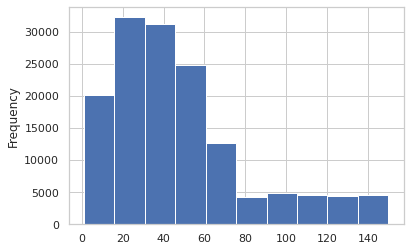

In [47]:
rfm_updated7['recency'].plot.hist()

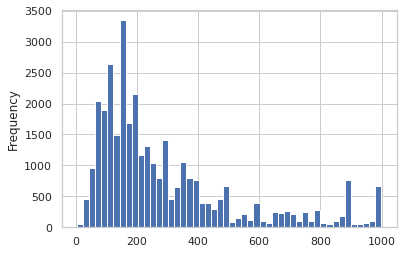

In [48]:
rfm_updated7[rfm_updated7["RFM_Score"] == "New Not Spender Customers"]['monetary'].plot.hist(bins=50)

In [49]:
RFM_with_SignUpDate2 = rfm_updated7.merge(projectData_SignUpDate,on = "User_ID", how= "left", )
RFM_with_SignUpDate2.head(5)

,User_ID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Score_Numbers,SignUp_Date
0,00000000-0000-0000-0000-000000000000,73,2.0,3558,1,4,4,Churned Best Customers,144,20181122
1,0000279A-87C8-E811-90F9-00155D619647,78,1.0,137,1,2,1,Not Big Spender Customers,121,20181122
2,00003B79-3370-EA11-80D3-00155D7CD320,64,1.0,4199,1,2,4,Churned Best Customers,124,20200327
3,0000A4AF-1986-EA11-80D4-00155D7CD320,36,1.0,477,3,2,2,New Not Spender Customers,322,20200424
4,00010E76-A380-EA11-80CE-00155D61134E,43,1.0,184,2,2,1,Not Big Spender Customers,221,20200417


In [50]:
RFM_with_SignUpDate2.nunique()

User_ID              143728
recency                 150
frequency                91
monetary               9365
r_quartile                4
f_quartile                2
m_quartile                4
RFM_Score                 6
RFM_Score_Numbers        32
SignUp_Date             551
dtype: int64

In [51]:
RFM_with_SignUpDate2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143728 entries, 0 to 143727
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   User_ID            143728 non-null  object  
 1   recency            143728 non-null  int64   
 2   frequency          143728 non-null  float64 
 3   monetary           143728 non-null  int64   
 4   r_quartile         143728 non-null  category
 5   f_quartile         143728 non-null  int64   
 6   m_quartile         143728 non-null  category
 7   RFM_Score          143728 non-null  object  
 8   RFM_Score_Numbers  143728 non-null  object  
 9   SignUp_Date        143728 non-null  int64   
dtypes: category(2), float64(1), int64(4), object(3)
memory usage: 10.1+ MB


In [53]:
RFM_Groupss=rfm_updated7[['RFM_Score', 'recency', 'frequency', 'monetary']].groupby(['RFM_Score']).agg(['mean', 'count','max','min'])
RFM_Groupss


recency         ... monetary      
                                             mean  count  ...      max   min
RFM_Score                                                 ...               
Best Customers                          13.308713   3994  ...  2807569  3244
Churned Best Customers                  94.919822  17112  ...   749593  1001
Lowest-Spending Active Loyal Customers  38.902244   3744  ...      998    16
New Not Spender Customers               22.769524  33357  ...      999     4
Not Big Spender Customers               73.345750  35222  ...      999     1
Promising Best Customers                32.630569  50299  ...  1137419  1000

[6 rows x 12 columns]

In [ ]:
from google.colab import files
RFM_Groupss.to_csv(path_or_buf='/content/RFM_Groupss.csv')

In [ ]:
files.download('/content/RFM_Groupss.csv')

In [ ]:
from google.colab import files
rfm_updated7.to_csv(path_or_buf='/content/signUp_RFMTeknosa.csv')

In [ ]:
files.download('/content/signUp_RFMTeknosa.csv')

In [54]:
RFM_with_SignUpDate2.describe()

,recency,frequency,monetary,f_quartile,SignUp_Date
count,143728.000000,143728.000000,1.437280e+05,143728.000000,1.437280e+05
mean,47.362135,1.247224,2.750022e+03,2.223269,2.019642e+07
std,34.014627,3.014598,1.684836e+04,0.629835,7.379951e+03
min,1.000000,1.000000,1.000000e+00,2.000000,2.018112e+07
25%,23.000000,1.000000,2.180000e+02,2.000000,2.020011e+07
50%,40.000000,1.000000,9.990000e+02,2.000000,2.020041e+07
75%,60.000000,1.000000,3.239000e+03,2.000000,2.020043e+07
max,150.000000,563.000000,2.807569e+06,4.000000,2.020053e+07


In [55]:
RFM_with_SignUpDate2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143728 entries, 0 to 143727
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   User_ID            143728 non-null  object  
 1   recency            143728 non-null  int64   
 2   frequency          143728 non-null  float64 
 3   monetary           143728 non-null  int64   
 4   r_quartile         143728 non-null  category
 5   f_quartile         143728 non-null  int64   
 6   m_quartile         143728 non-null  category
 7   RFM_Score          143728 non-null  object  
 8   RFM_Score_Numbers  143728 non-null  object  
 9   SignUp_Date        143728 non-null  int64   
dtypes: category(2), float64(1), int64(4), object(3)
memory usage: 10.1+ MB


In [56]:
product_quantity_performance = projectData.groupby("DateTime")["Quantity"].sum().reset_index()
product_quantity_performance

,DateTime,Quantity
0,2020-01-01,383
1,2020-01-02,546
2,2020-01-03,547
3,2020-01-04,540
4,2020-01-05,337
...,...,...
145,2020-05-25,1214
146,2020-05-26,1217
147,2020-05-27,2678
148,2020-05-28,2652


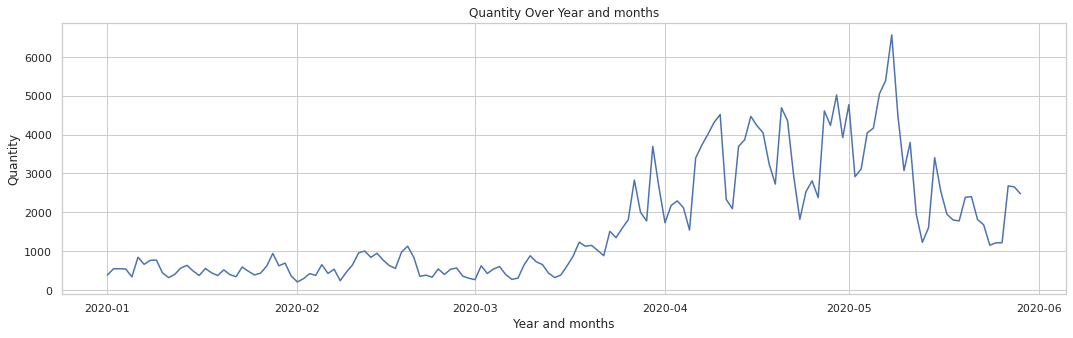

In [57]:
# Visualize it
plt.figure(figsize=(18,5))
sns.lineplot(x= "DateTime" ,y = "Quantity", data = product_quantity_performance)
plt.xlabel("Year and months")
plt.ylabel("Quantity")
plt.title("Quantity Over Year and months")
plt.show()



In [58]:
product_revenue_performance = projectData.groupby("DateTime")["Revenue"].sum().reset_index()
product_revenue_performance

,DateTime,Revenue
0,2020-01-01,431034.96
1,2020-01-02,1394399.50
2,2020-01-03,1491376.84
3,2020-01-04,1597144.91
4,2020-01-05,584669.35
...,...,...
145,2020-05-25,1582978.59
146,2020-05-26,1364185.80
147,2020-05-27,4462628.96
148,2020-05-28,4966453.92


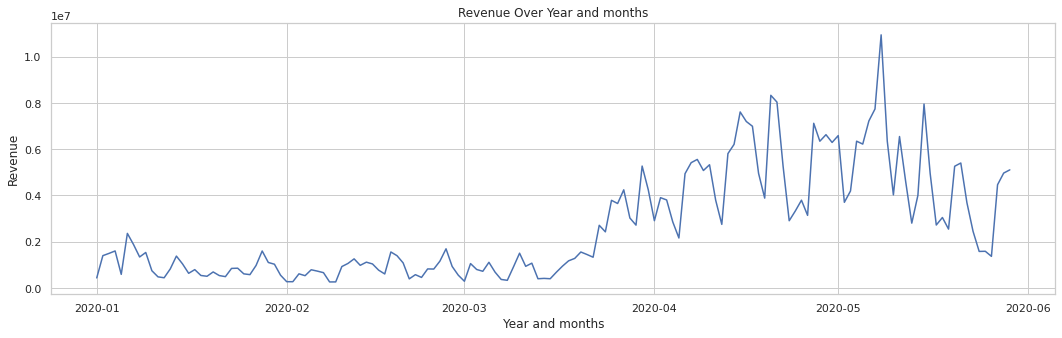

In [59]:
# Visualize it
plt.figure(figsize=(18,5))
sns.lineplot(x= "DateTime" ,y = "Revenue", data = product_revenue_performance)
plt.xlabel("Year and months")
plt.ylabel("Revenue")
plt.title("Revenue Over Year and months")
plt.show()


In [62]:
# Create column for year and month
projectData["Order_Year"] = projectData["DateTime"].dt.year
projectData["Order_YM"] = projectData["DateTime"].dt.strftime("%Y-%m")
projectData.head(5)



,User_ID,SignUp_Date,Transaction_ID,Date,Revenue,Quantity,DateTime,SignUp_DateTime,Order_Year,Order_YM
0,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2249427486,20200430,128970.00,10,2020-04-30,2018-11-22,2020,2020-04
1,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2249427729,20200430,128970.00,10,2020-04-30,2018-11-22,2020,2020-04
2,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2249908620,20200514,122091.00,9,2020-05-14,2018-11-22,2020,2020-05
3,67A9CBA3-FDC3-E811-90F9-00155D619647,20181122,2248612580,20200415,118670.00,30,2020-04-15,2018-11-22,2020,2020-04
4,5606F992-F6CA-E911-80CB-00155D61134E,20191023,2249010961,20200421,103494.99,15,2020-04-21,2019-10-23,2020,2020-04


In [63]:
sales_by_year_month = projectData.groupby("Order_YM").sum().reset_index()
sales_by_year_month.head()


,Order_YM,SignUp_Date,Date,Revenue,Quantity,Order_Year
0,2020-01,249427165768,249511831850,2.976269e+07,16359,24951040
1,2020-02,248440470516,248523250760,2.347360e+07,16647,24852060
2,2020-03,469639330414,469758472775,5.138137e+07,33570,46975100
3,2020-04,1408458030039,1408777046441,1.523121e+08,99789,140874800
4,2020-05,1244277787867,1244573780086,1.383534e+08,83282,124454220


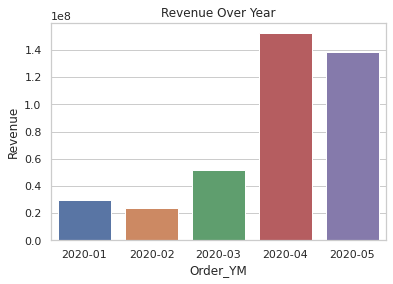

In [64]:
# Visualize it
sns.barplot( x = "Order_YM", y = "Revenue", data = sales_by_year_month)
plt.xlabel("Order_YM")
plt.ylabel("Revenue")
plt.title("Revenue Over Year")
plt.show()



In [65]:
RFM_with_SignUpDate2ss = RFM_with_SignUpDate2.groupby("RFM_Score")["monetary"].sum().reset_index()
RFM_with_SignUpDate2ss

,RFM_Score,monetary
0,Best Customers,84811781
1,Churned Best Customers,68490941
2,Lowest-Spending Active Loyal Customers,1690180
3,New Not Spender Customers,9757586
4,Not Big Spender Customers,10505423
5,Promising Best Customers,219999198


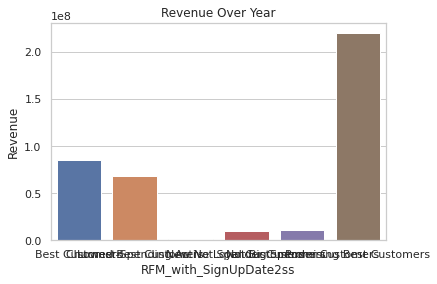

In [66]:
# Visualize it
sns.barplot( x = "RFM_Score", y = "monetary", data = RFM_with_SignUpDate2ss)
plt.xlabel("RFM_with_SignUpDate2ss")
plt.ylabel("Revenue")
plt.title("Revenue Over Year")
plt.show()

